In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [12]:
#Reading Data
df0 = pd.read_csv(r"C:\Users\NIKITHA\Desktop\Projects\machine learning projects\Time Series\Using Prophet\Data\CONVENIENT_global_confirmed_cases.csv")
df0["India"]

0         NaN
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1138    281.0
1139    266.0
1140    326.0
1141    379.0
1142    440.0
Name: India, Length: 1143, dtype: float64

In [13]:
#Implementing Lag Feature
df0["lag"]=df0["India"].shift(1)
df0["lag"]

0         NaN
1         NaN
2         0.0
3         0.0
4         0.0
        ...  
1138    324.0
1139    281.0
1140    266.0
1141    326.0
1142    379.0
Name: lag, Length: 1143, dtype: float64

In [14]:
# Remove missing values and generate new df
df_lag = df0.copy().dropna()

# Training data
X_lag = df_lag[["lag"]]  # feature
y_lag = df_lag.India  # target

# Train the model
model_lag = LinearRegression()
model_lag.fit(X_lag, y_lag)

# Generate a series of predicted values from our lag data
y_lag_pred = pd.Series(model_lag.predict(X_lag))

In [15]:
# Obtain model intercept and coefficient
model_lag.intercept_, model_lag.coef_

(200.29588347924437, array([0.99489604]))

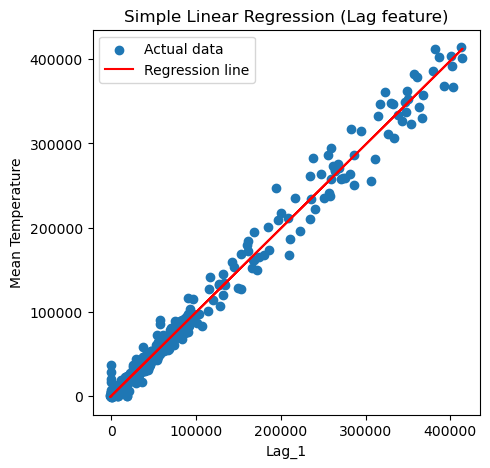

In [16]:
plt.figure(figsize=(5, 5))

# Plot the data points
plt.scatter(X_lag, y_lag,label='Actual data')

# Plot the regression line
plt.plot(X_lag, y_lag_pred, color='red', label='Regression line')

# Add labels and a legend
plt.xlabel('Lag_1')
plt.ylabel('Mean Temperature')
plt.title('Simple Linear Regression (Lag feature)')
plt.legend()